## Análise de dados do Strava e de clima com Python
#### Passos realizados:
* Autenticação e coleta dos dados da minha conta no Strava via API
* Tratamento e limpeza de colunas desnecessárias
* Autenticação e coleta dos dados de clima da API Visual Crossing
* Tratamento e limpeza dos dados
* Fusão dos dados do Strava e de clima
* Exportação dos dados em csv
* Análise estatística básica
* Visualização dos dados

In [1]:
# importando as bibliotecas
from stravalib.client import Client
import pandas as pd
from os.path import join
import requests
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib as plt
from plotly_calplot import calplot

-  Abrir essa URL no navegador, logar no strava e autorizar, ele vai direcionar para uma página em branco, na URL dessa pagina terá um "code"
-  Copiar o code encontrado na url e definir a variável "code" da próxima célula (não alterar as outras)
- https://www.strava.com/oauth/authorize?client_id=109706&redirect_uri=http://localhost&response_type=code&scope=activity:read_all

In [2]:
# definindo os dados para autenticação na API do Strava
client_id = '{client_id}' # obter na conta do strava
client_secret = '{client_secret}' # obter na conta do strava
code = 'be174ce8c2923a3d43312c31cbc124cbc6c6c0da' # obter autorizando o acesso na URL acima


In [3]:
post = requests.post(f'https://www.strava.com/oauth/token?client_id={client_id}&client_secret={client_secret}&code={code}&grant_type=authorization_code')
post.status_code

200

In [5]:
# obtendo o token de acesso
access_token = post.json()['access_token']

In [6]:
# instanciando o objeto que acessa os dados
client = Client(access_token=access_token)

In [7]:
# obtendo os dados da API
activities = client.get_activities()
sample = list(activities)[0]


In [8]:
sample.to_dict()

{'id': 11064226788,
 'achievement_count': 0,
 'athlete': {'id': 22329478,
  'city': None,
  'country': None,
  'created_at': None,
  'firstname': None,
  'lastname': None,
  'premium': None,
  'profile': None,
  'profile_medium': None,
  'resource_state': 1,
  'sex': None,
  'state': None,
  'summit': None,
  'updated_at': None,
  'bikes': None,
  'clubs': None,
  'follower_count': None,
  'friend_count': None,
  'ftp': None,
  'measurement_preference': None,
  'shoes': None,
  'weight': None,
  'is_authenticated': None,
  'athlete_type': None,
  'friend': None,
  'follower': None,
  'approve_followers': None,
  'badge_type_id': None,
  'mutual_friend_count': None,
  'date_preference': None,
  'email': None,
  'super_user': None,
  'email_language': None,
  'max_heartrate': None,
  'username': None,
  'description': None,
  'instagram_username': None,
  'offer_in_app_payment': None,
  'global_privacy': None,
  'receive_newsletter': None,
  'email_kom_lost': None,
  'dateofbirth': None,

In [9]:
# selecionando as colunas que eu quero
cols = ['id', 'name', 'start_date_local', 'type', 'elapsed_time','distance',
        'max_heartrate', 'average_heartrate','average_speed', 'calories', 'max_speed', 'total_elevation_gain']

In [10]:
# iterando no objeto activities e obtendo cada atividade em uma lista
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in cols])

In [11]:
# criando o dataframe dos dados do Strava
df_strava = pd.DataFrame(data, columns=cols)

In [12]:
df_strava.head()

,id,name,start_date_local,type,elapsed_time,distance,max_heartrate,average_heartrate,average_speed,calories,max_speed,total_elevation_gain
0,11064226788,Treinamento com peso ao entardecer,2024-03-28 20:25:47,WeightTraining,0 days 01:07:32,0.0,125.0,93.9,0.000,None,0.0,0.0
1,11054848479,Corrida ao entardecer,2024-03-27 18:09:24,Run,0 days 00:03:38,280.0,103.0,91.2,1.284,None,0.0,0.0
2,11054848523,Treinamento com peso vespertino,2024-03-27 17:22:54,WeightTraining,0 days 00:46:20,0.0,117.0,95.3,0.000,None,0.0,0.0
3,11034339482,Corrida matinal,2024-03-25 08:14:35,Run,0 days 00:10:00,840.0,125.0,107.8,1.400,None,0.0,0.0
4,11034339510,Treinamento com peso matinal,2024-03-25 07:23:11,WeightTraining,0 days 00:51:19,0.0,120.0,97.6,0.000,None,0.0,0.0


In [13]:
# obtendo os tipos de atividade física que tenho registrado na minha conta
df_strava['type'].value_counts()

type
WeightTraining    70
Run               38
Walk              12
Ride               5
Swim               2
Name: count, dtype: int64

In [14]:
# excluindo os dados de natação, pois me lembro que foi apenas um teste do smart watch quando fui na piscina
df_strava = df_strava [~df_strava ['type']. isin (['Swim'])]

In [15]:
# verificando as colunas
df_strava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 126
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   id                    125 non-null    int64          
 1   name                  125 non-null    object         
 2   start_date_local      125 non-null    datetime64[ns] 
 3   type                  125 non-null    object         
 4   elapsed_time          125 non-null    timedelta64[ns]
 5   distance              125 non-null    float64        
 6   max_heartrate         105 non-null    float64        
 7   average_heartrate     105 non-null    float64        
 8   average_speed         125 non-null    float64        
 9   calories              0 non-null      object         
 10  max_speed             125 non-null    float64        
 11  total_elevation_gain  125 non-null    float64        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3), timedelta64[ns

In [16]:
# alterando a distancia para km e as velocidade média e máxima para km/h
df_strava['distance'] = (df_strava['distance']/1000).round(2)
df_strava['average_speed'] = (df_strava['average_speed'] * 3.6).round(2)
df_strava['max_speed'] = (df_strava['max_speed'] * 3.6).round(2)

In [17]:
# obtendo apenas os minutos de cada atividade
df_strava['time_min'] = df_strava['elapsed_time'].dt.total_seconds()/60
df_strava['time_min'] = df_strava['time_min'].round(2)

In [18]:
# verificando que não veio informação das calorias das atividades, embora tenha essa informação no app do strava
df_strava['calories'].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
# decidi remover a coluna original do tempo decorrido, a coluna ID da atividade e a de calorias pois está nula infelizmente
df_strava.drop(['elapsed_time','id', 'calories'], axis=1, inplace=True)
df_strava.head()

,name,start_date_local,type,distance,max_heartrate,average_heartrate,average_speed,max_speed,total_elevation_gain,time_min
0,Treinamento com peso ao entardecer,2024-03-28 20:25:47,WeightTraining,0.00,125.0,93.9,0.00,0.0,0.0,67.53
1,Corrida ao entardecer,2024-03-27 18:09:24,Run,0.28,103.0,91.2,4.62,0.0,0.0,3.63
2,Treinamento com peso vespertino,2024-03-27 17:22:54,WeightTraining,0.00,117.0,95.3,0.00,0.0,0.0,46.33
3,Corrida matinal,2024-03-25 08:14:35,Run,0.84,125.0,107.8,5.04,0.0,0.0,10.00
4,Treinamento com peso matinal,2024-03-25 07:23:11,WeightTraining,0.00,120.0,97.6,0.00,0.0,0.0,51.32


In [20]:
# obtendo mais dados relacionados a data da atividade, como horario inicial, mês, dia, ano, dia do ano, dia da semana e formatando a data
df_strava['date'] = pd.to_datetime(df_strava['start_date_local'])
df_strava['start_time'] = df_strava['start_date_local'].dt.time
df_strava['date'] = df_strava['date'].dt.date
df_strava['month'] = df_strava['start_date_local'].dt.month_name()
df_strava['year'] = df_strava['start_date_local'].dt.year
df_strava['year'] = (df_strava['year']).astype(object)
df_strava['dayofyear'] = df_strava['start_date_local'].dt.dayofyear
df_strava['dayofyear'] = pd.to_numeric(df_strava['dayofyear'])
df_strava['weekday'] = df_strava['start_date_local'].dt.day_name()

In [21]:
df_strava.head(3)

,name,start_date_local,type,distance,max_heartrate,average_heartrate,average_speed,max_speed,total_elevation_gain,time_min,date,start_time,month,year,dayofyear,weekday
0,Treinamento com peso ao entardecer,2024-03-28 20:25:47,WeightTraining,0.00,125.0,93.9,0.00,0.0,0.0,67.53,2024-03-28,20:25:47,March,2024,88,Thursday
1,Corrida ao entardecer,2024-03-27 18:09:24,Run,0.28,103.0,91.2,4.62,0.0,0.0,3.63,2024-03-27,18:09:24,March,2024,87,Wednesday
2,Treinamento com peso vespertino,2024-03-27 17:22:54,WeightTraining,0.00,117.0,95.3,0.00,0.0,0.0,46.33,2024-03-27,17:22:54,March,2024,87,Wednesday
3,Corrida matinal,2024-03-25 08:14:35,Run,0.84,125.0,107.8,5.04,0.0,0.0,10.00,2024-03-25,08:14:35,March,2024,85,Monday
4,Treinamento com peso matinal,2024-03-25 07:23:11,WeightTraining,0.00,120.0,97.6,0.00,0.0,0.0,51.32,2024-03-25,07:23:11,March,2024,85,Monday


In [22]:
# removendo a coluna original de data
df_strava = df_strava.drop(['start_date_local'], axis=1)

In [23]:
# reordenando as colunas
df_strava = df_strava.reindex(['date', 'start_time', 'name', 'type','month', 'year', 'dayofyear','weekday','distance',
                               'max_heartrate', 'average_heartrate', 'average_speed', 'max_speed','total_elevation_gain' ,'time_min'], axis=1)

In [25]:
# verificando quantas atividades estão registradas por ano, da pra ver que eu não era muito ativo até 2023, em 2022 não registrei nenhuma ativiade no Strava
df_strava['year'].value_counts()

year
2024    73
2023    32
2021    10
2020     6
2019     2
2017     2
Name: count, dtype: int64

In [26]:
# decido considerar na análise apenas as atividades realizadas a partir de 2023,
# pois foi quando eu comecei a fazer atividades com mais frequência e registrar com o smartwatch
df_strava = df_strava[df_strava['year']>=2023]
df_strava.describe().round()

,dayofyear,distance,max_heartrate,average_heartrate,average_speed,max_speed,total_elevation_gain,time_min
count,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
mean,115.0,1.0,131.0,101.0,2.0,1.0,1.0,48.0
std,109.0,1.0,22.0,15.0,3.0,5.0,3.0,30.0
min,2.0,0.0,88.0,78.0,0.0,0.0,0.0,1.0
25%,43.0,0.0,117.0,92.0,0.0,0.0,0.0,38.0
50%,67.0,0.0,125.0,96.0,0.0,0.0,0.0,47.0
75%,173.0,2.0,136.0,107.0,5.0,0.0,0.0,56.0
max,347.0,6.0,190.0,148.0,7.0,32.0,18.0,266.0


In [27]:
# verificando quais foram as sessões de treino acima de 100 minutos
df_strava.loc[ df_strava['time_min'] >= 100]

,date,start_time,name,type,month,year,dayofyear,weekday,distance,max_heartrate,average_heartrate,average_speed,max_speed,total_elevation_gain,time_min
10,2024-03-15,07:32:52,Treinamento com peso matinal,WeightTraining,March,2024,75,Friday,0.0,125.0,88.4,0.0,0.0,0.0,109.73
47,2024-02-09,07:27:08,Treinamento com peso matinal,WeightTraining,February,2024,40,Friday,0.0,125.0,86.9,0.0,0.0,0.0,266.43
88,2023-10-09,12:15:51,Treinamento com peso na hora do almoço,WeightTraining,October,2023,282,Monday,0.0,127.0,88.0,0.0,0.0,0.0,145.48


In [28]:
# Aqui e decidi remover as atividade com menos de 10 minutos, pois foram apenas testes do smartwatch.
# Defini também que as sessões de treino com mais de 100 minutos fossem definidas para 60 minutos. 
# Fiz isso porque nessas atividades provavelmente eu esqueci de desligar o smartwatch.
# Pensei em excluir a atividade da análise, mas eu realizei elas, somente o tempo que está errado.
# Porém, normalmente as ativiades levam até 60 minutos, então acredito que
# a melhor opção seja definir o tempo máximo em 60 minutos para estes casos.
df_strava.loc[ df_strava['time_min'] >= 100, 'time_min'] = 60
df_strava = df_strava[df_strava['time_min']>10]
df_strava.describe()

,dayofyear,distance,max_heartrate,average_heartrate,average_speed,max_speed,total_elevation_gain,time_min
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000
mean,115.696970,0.798788,132.353535,101.501010,1.671313,1.568889,0.785859,46.90596
std,110.469356,1.382409,21.855422,14.856727,2.636982,5.081874,2.807679,15.70772
min,2.000000,0.000000,97.000000,82.200000,0.000000,0.000000,0.000000,11.63000
25%,39.500000,0.000000,117.000000,92.100000,0.000000,0.000000,0.000000,39.64000
50%,66.000000,0.000000,125.000000,95.600000,0.000000,0.000000,0.000000,48.07000
75%,173.500000,1.565000,138.500000,106.600000,4.520000,0.000000,0.000000,56.50000
max,347.000000,5.530000,190.000000,147.800000,6.970000,31.990000,18.000000,87.50000


In [29]:
# verificando quantas atividades eu fiz por tipo, podemos ver que fiz mais treinos de musculação do que caminhadas/corridas
df_strava['type'].value_counts()

type
WeightTraining    69
Run               30
Name: count, dtype: int64

In [30]:
# estamos em março de 2024 e eu ja fiz mais atividades físicas do que em todo ano de 2023!! Uma grande melhora
# aqui temos um problema pois eu comecei a registrar as atividades no Strava automaticamente só depois que comprei o smartwatch, que foi em junho/2023
df_strava['year'].value_counts()

year
2024    68
2023    31
Name: count, dtype: int64

In [31]:
df_strava['date'] = pd.to_datetime(df_strava['date'])

In [32]:
# verificando quais dias da semana que eu pratiquei mais atividade física
# aos finais de semana geralmente eu não pratico atividade física
df_strava['weekday'].value_counts()

weekday
Friday       20
Wednesday    19
Thursday     18
Tuesday      18
Monday       14
Saturday      7
Sunday        3
Name: count, dtype: int64

In [33]:
# obtendo a data máxima e a data mínima no dataframe
data_inicio = df_strava['date'].min()
data_fim = df_strava['date'].max()

# formatando as datas
data_inicio = data_inicio.strftime('%Y-%m-%d')
data_fim = data_fim.strftime('%Y-%m-%d')

# definindo a minha cidade e a minha key para obter os dados do clima
city = 'Joinville'
key = '{key}' # obter no site do visual crossing

In [34]:
# definindo a URL para obter os dados do clima
URL = join("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/",
          f"{city}/{data_inicio}/{data_fim}?unitGroup=metric&include=days&key={key}&contentType=csv")

In [35]:
# lendo os dados do clima e ja criando o dataframe
df_clima = pd.read_csv(URL)
df_clima.head(2)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Joinville, SC, Brasil",2023-06-09,27.7,13.6,18.7,28.9,13.6,18.8,16.8,89.9,...,12.2,6,10,2023-06-09T06:58:50,2023-06-09T17:30:26,0.69,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"SBNF,83905099999,86946099999,F5423,82599199999..."
1,"Joinville, SC, Brasil",2023-06-10,32.1,11.4,21.9,31.7,11.4,21.9,14.7,67.9,...,12.8,6,10,2023-06-10T06:59:13,2023-06-10T17:30:27,0.75,Clear,Clear conditions throughout the day.,clear-day,"SBNF,83905099999,86946099999,F5423,82599199999..."
2,"Joinville, SC, Brasil",2023-06-11,25.6,15.1,20.2,25.6,15.1,20.2,16.3,79.5,...,7.0,6,10,2023-06-11T06:59:35,2023-06-11T17:30:29,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"SBNF,83905099999,86946099999,F5423,82599199999..."
3,"Joinville, SC, Brasil",2023-06-12,16.7,13.0,14.3,16.7,13.0,14.3,13.9,97.6,...,1.6,1,10,2023-06-12T06:59:57,2023-06-12T17:30:33,0.80,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"SBNF,83905099999,86946099999,F5423,82599199999..."
4,"Joinville, SC, Brasil",2023-06-13,13.0,12.0,12.7,13.0,12.0,12.7,11.5,92.3,...,1.6,1,10,2023-06-13T07:00:18,2023-06-13T17:30:37,0.84,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"SBNF,83905099999,86946099999,F5423,82599199999..."


In [36]:
# renomeando e formatando a coluna de data
# aproveitei para verificar se a data minima e máxima do dataframe estão de acordo com o dataframe do strava
df_clima['date'] = pd.to_datetime(df_clima['datetime'])
df_clima['date'].value_counts

<bound method IndexOpsMixin.value_counts of 0     2023-06-09
1     2023-06-10
2     2023-06-11
3     2023-06-12
4     2023-06-13
         ...    
289   2024-03-24
290   2024-03-25
291   2024-03-26
292   2024-03-27
293   2024-03-28
Name: date, Length: 294, dtype: datetime64[ns]>

In [37]:
# verificando as colunas
df_clima.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'date'],
      dtype='object')

In [38]:
# dropando as colunas que eu não quero
df_clima_selected = df_clima.drop(['name', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
                                   'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
                                   'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
                                   'moonphase', 'stations', 'datetime'], axis=1)

In [39]:
# verificando o dataframe
df_clima_selected.set_index('date')

,tempmax,tempmin,temp,conditions,description,icon
date,,,,,,
2023-06-09,27.7,13.6,18.7,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day
2023-06-10,32.1,11.4,21.9,Clear,Clear conditions throughout the day.,clear-day
2023-06-11,25.6,15.1,20.2,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain
2023-06-12,16.7,13.0,14.3,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
2023-06-13,13.0,12.0,12.7,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
...,...,...,...,...,...,...
2024-03-24,25.0,19.0,22.0,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain
2024-03-25,29.8,20.0,24.3,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain
2024-03-26,27.0,20.4,23.6,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain


In [42]:
# criando um dataframe com os dados do strava e os dados de clima utilizando a data como key
df_strava_clima = pd.merge(df_strava, df_clima_selected, on="date", how='left')

df_strava_clima.head(2)

,date,start_time,name,type,month,year,dayofyear,weekday,distance,max_heartrate,...,average_speed,max_speed,total_elevation_gain,time_min,tempmax,tempmin,temp,conditions,description,icon
0,2024-03-28,20:25:47,Treinamento com peso ao entardecer,WeightTraining,March,2024,88,Thursday,0.0,125.0,...,0.0,0.0,0.0,67.53,28.9,17.3,23.4,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
1,2024-03-27,17:22:54,Treinamento com peso vespertino,WeightTraining,March,2024,87,Wednesday,0.0,117.0,...,0.0,0.0,0.0,46.33,27.9,18.3,23.6,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain


In [45]:
# verificando todas as colunas
df_strava_clima.columns

Index(['date', 'start_time', 'name', 'type', 'month', 'year', 'dayofyear',
       'weekday', 'distance', 'max_heartrate', 'average_heartrate',
       'average_speed', 'max_speed', 'total_elevation_gain', 'time_min',
       'tempmax', 'tempmin', 'temp', 'conditions', 'description', 'icon'],
      dtype='object')

In [46]:
# salvando em csv cada dataframe tratado obtido até aqui
df_strava.to_csv('../data/dados_strava.csv')
df_clima.to_csv('../data/dados_clima.csv')
df_strava_clima.to_csv('../data/dados_strava_clima.csv')

In [47]:
# separei um dataframe para as caminhadas e outro para os treinos de musculação
df_run = df_strava_clima[df_strava_clima['type']=='Run']
df_weight = df_strava_clima[df_strava_clima['type']=='WeightTraining']

In [48]:
# removendo do df de musculação os dados de velocidade máxima e distancia, pois para os treinos de musculação são irrelevantes
df_weight = df_weight.drop(['average_speed', 'distance', 'max_speed', 'total_elevation_gain'], axis=1)

In [49]:
# obtendo o pace médio das caminhadas
df_run['avg_pace'] = (df_run['time_min']/df_run['distance']).round(2)
df_run.head(2)

,date,start_time,name,type,month,year,dayofyear,weekday,distance,max_heartrate,...,max_speed,total_elevation_gain,time_min,tempmax,tempmin,temp,conditions,description,icon,avg_pace
3,2024-03-22,20:50:28,Corrida ao entardecer,Run,March,2024,82,Friday,2.30,172.0,...,0.0,0.0,24.13,25.9,20.0,23.2,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,10.49
6,2024-03-19,20:15:59,Corrida ao entardecer,Run,March,2024,79,Tuesday,1.59,122.0,...,0.0,0.0,20.32,31.8,24.5,27.2,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,12.78


## Plotando algumas visualizações e explorando os dados

In [112]:
# criando um heatmap em um calendário, assim posso ver 
# a evolução e me motivar a ter constância nas atividades e ver esse calendário todo verde :D
calplot_df = df_strava_clima[['date', 'time_min']]
fig = calplot(data=df_strava_clima, x='date', y='time_min', gap=0.2,
              name="Data", month_lines_width=2, years_title=True,
              space_between_plots=0.2
              )
fig.show()

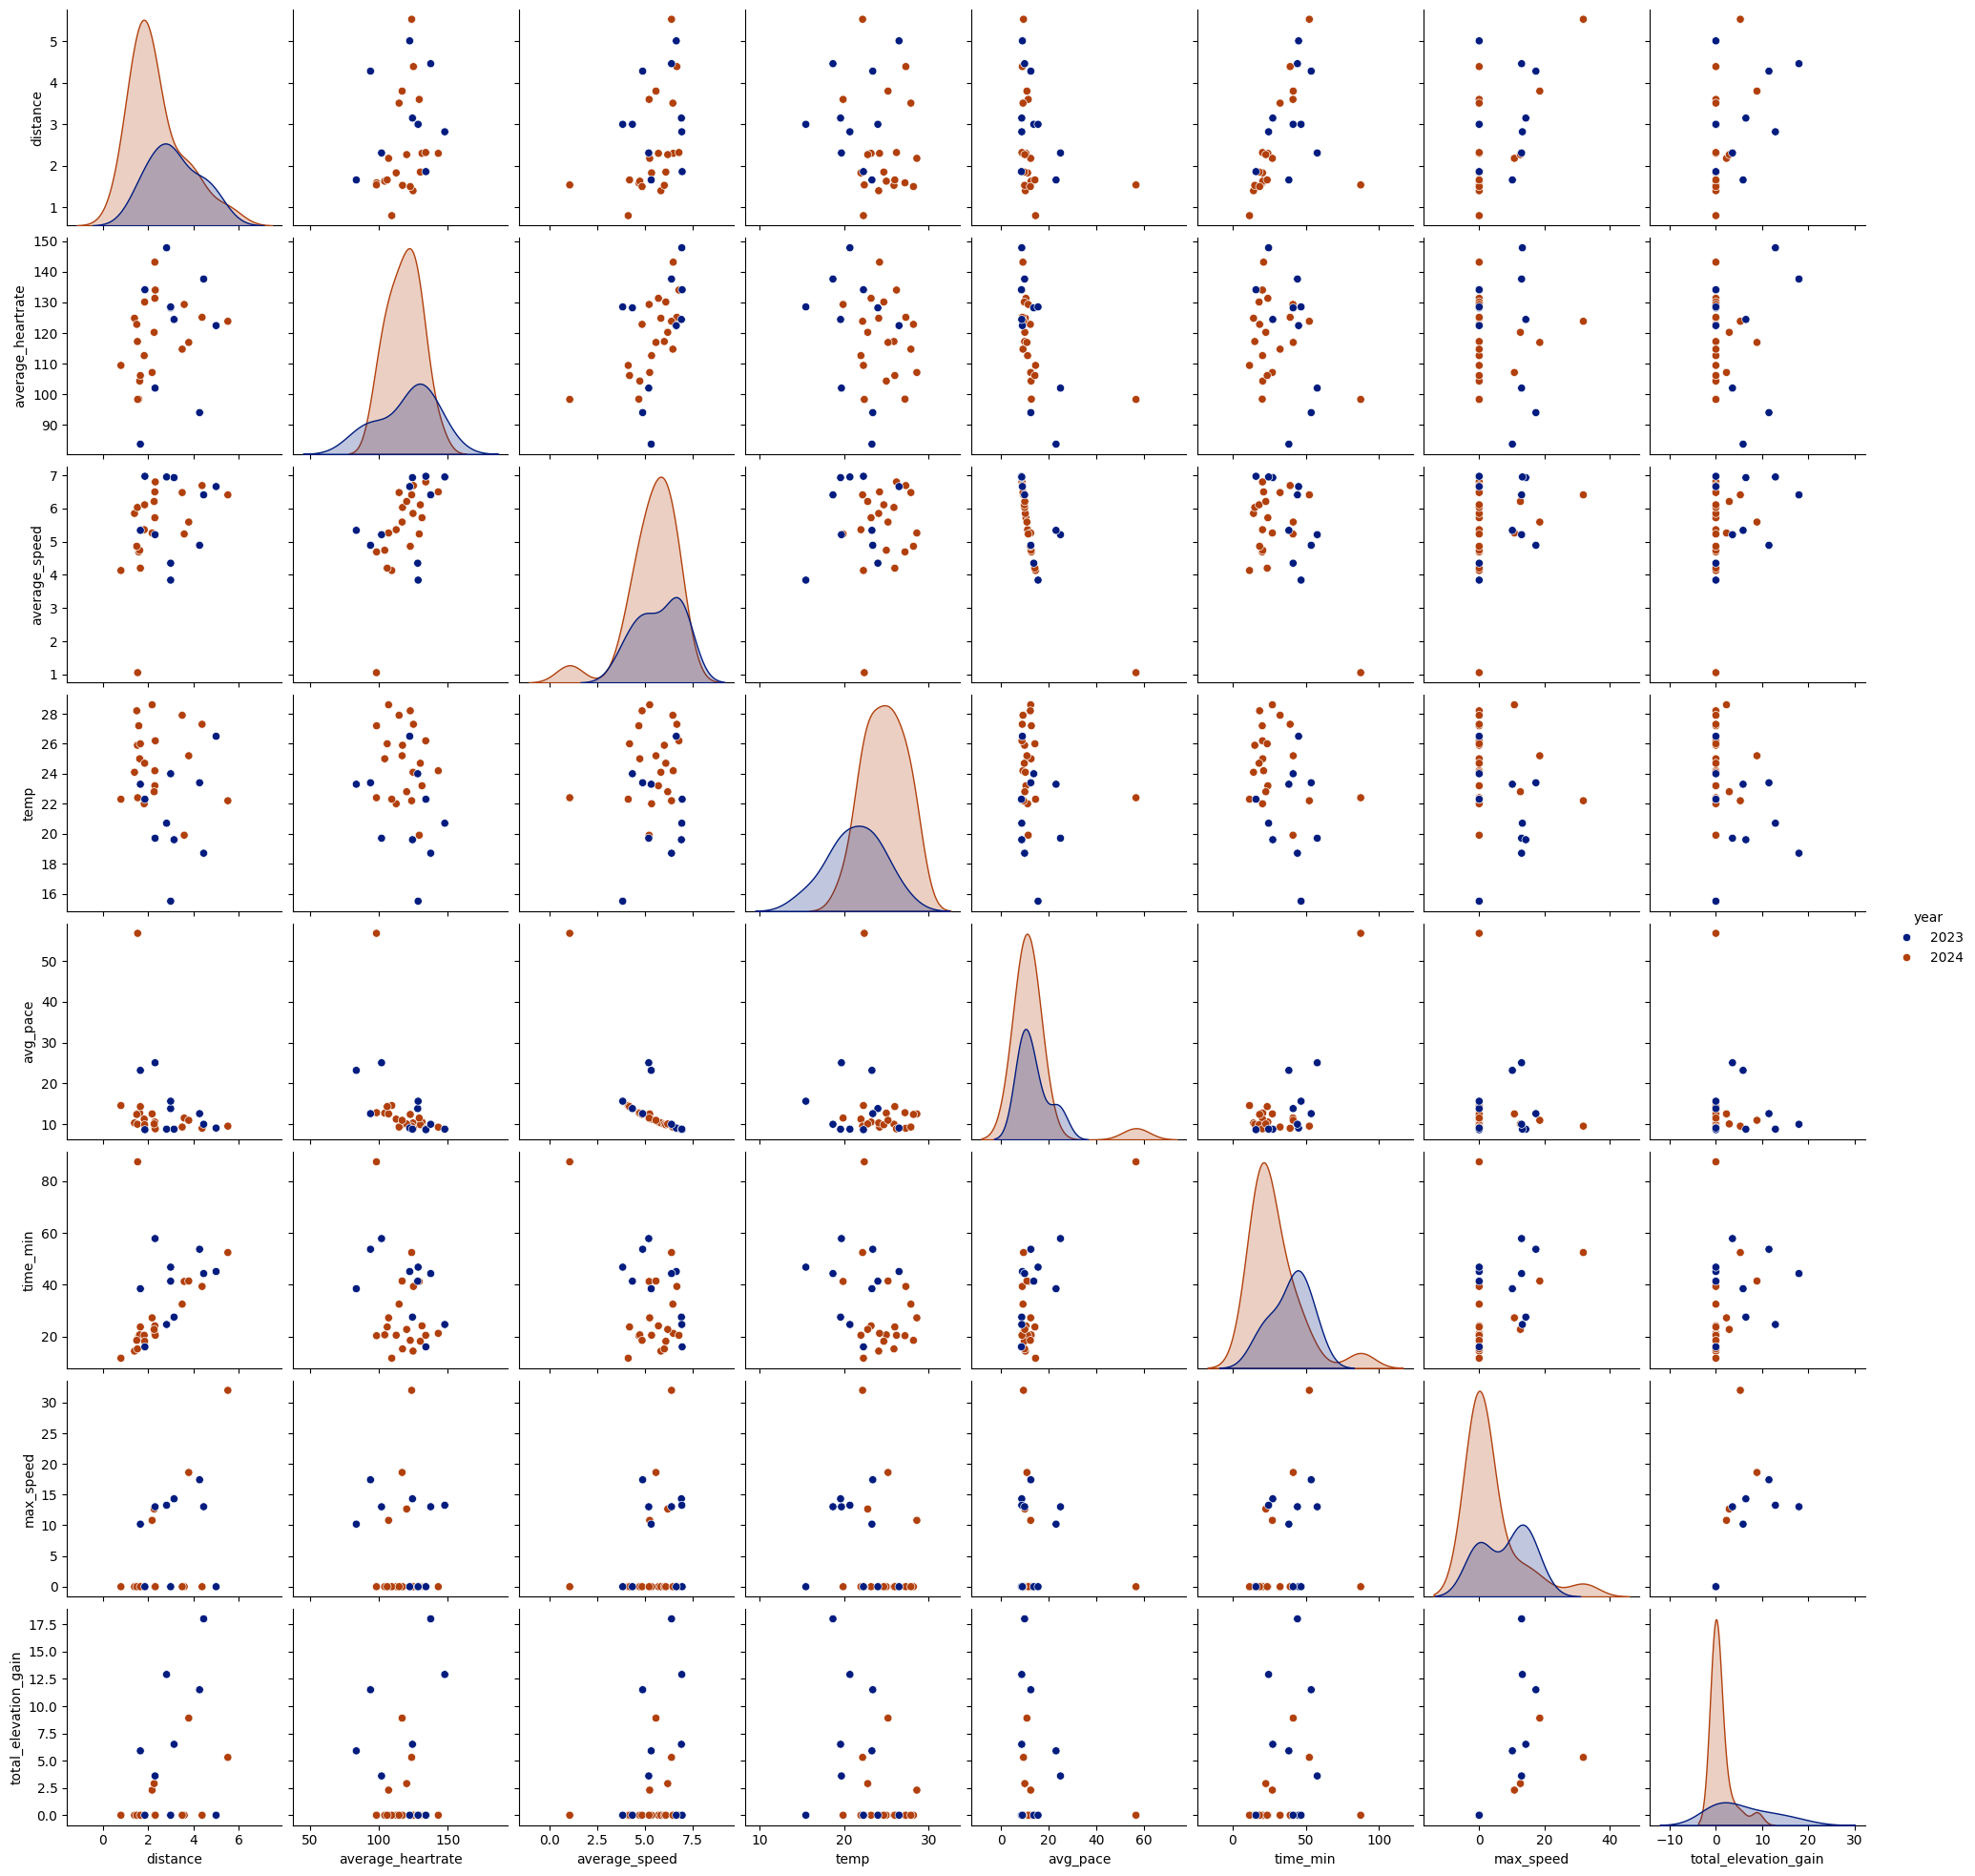

In [49]:
# criando uma visualização de pairplot, para verificar correlações entre as variáveis e a diferença entre 2023 e 2024
pp_df_run = df_run[['distance', 'average_heartrate', 'average_speed', 'temp', 'avg_pace', 'time_min', 'max_speed', 'year', 'total_elevation_gain']]
sns.pairplot(pp_df_run, hue = 'year', palette='dark')

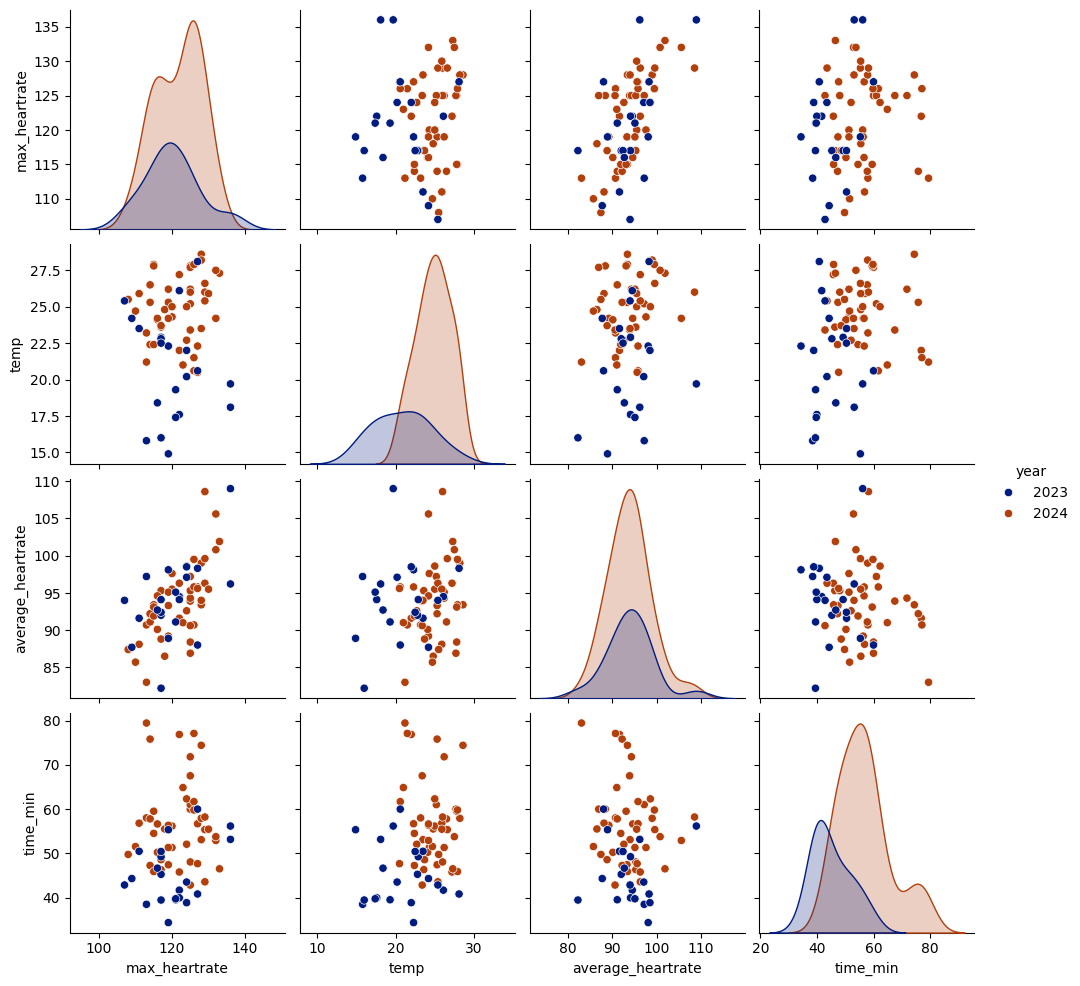

In [113]:
# plotando um gráfico de pairplot agora pra os treinos de musculação
pp_df_weight = df_weight[['max_heartrate', 'temp', 'average_heartrate', 'time_min', 'year']]
sns.pairplot(pp_df_weight, hue='year', palette="dark")

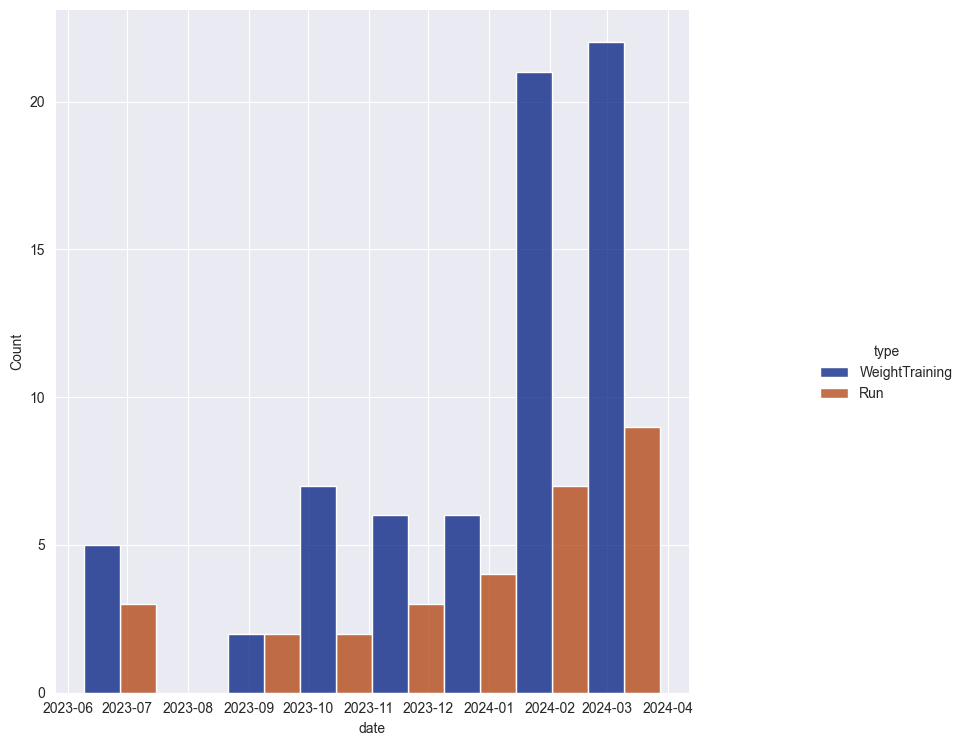

In [491]:
# verificando a distribuição de treinos ao longo do tempo
# podemos perceber que em 2023 eu não treinava com tanta frequencia e a partir de fevereiro de 2024 a frequencia aumentou
fig = sns.displot(df_strava_clima, x="date", hue="type", multiple="dodge", palette="dark")
fig.figure.set_size_inches(10, 8)

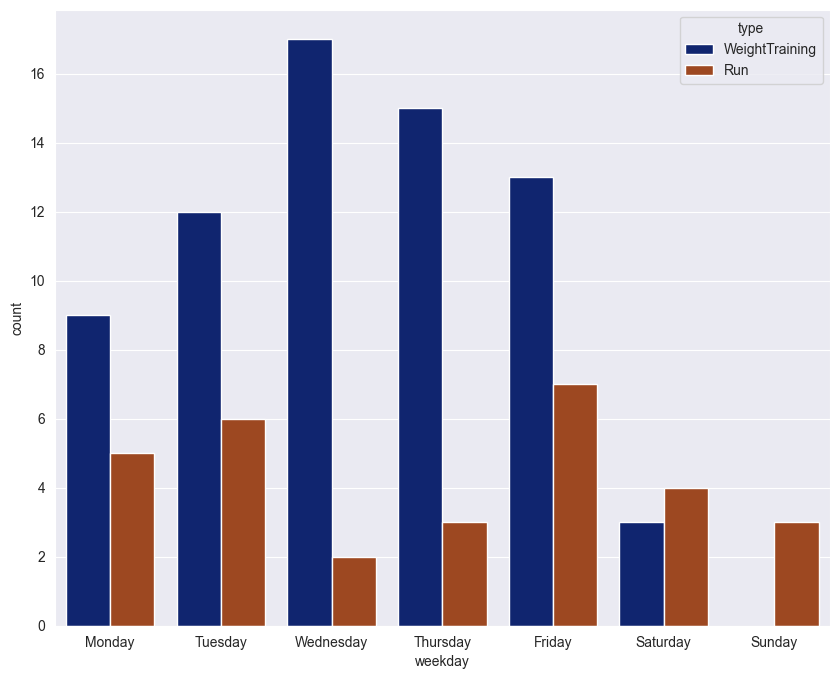

In [492]:
# verificando a quantidade de treinos por dia da semana
fig = sns.countplot(data=df_strava, x='weekday', hue='type',
                   order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday'], palette="dark")
fig.figure.set_size_inches(10, 8)

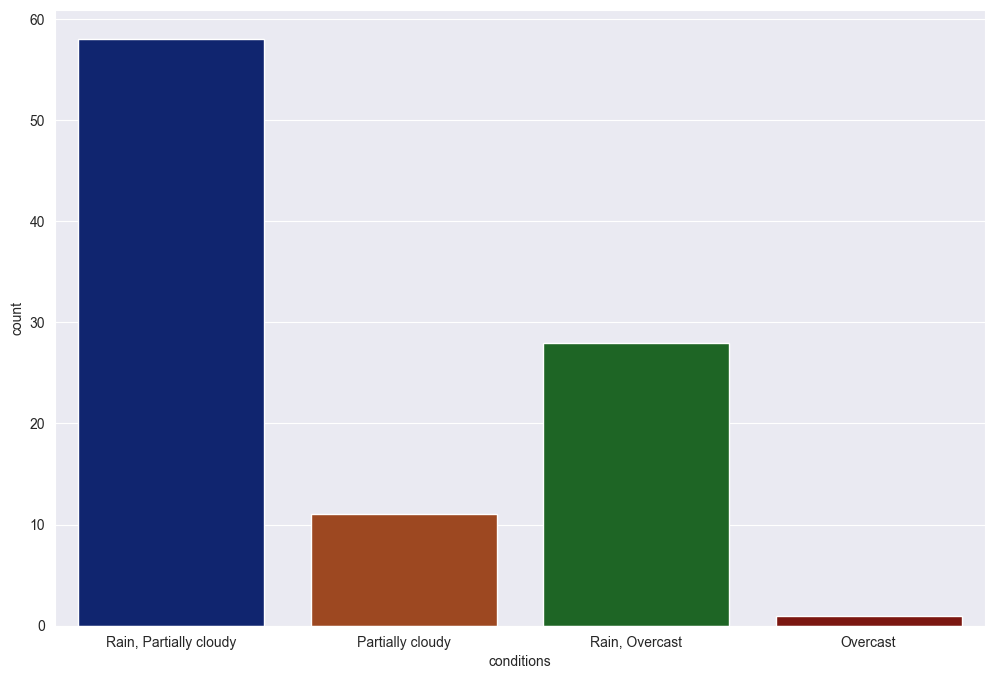

In [ ]:
# verificando em quais condições climáticas eu fui treinar
fig = sns.countplot(data=df_strava_clima, x='conditions', palette="dark")
fig.figure.set_size_inches(12, 8)

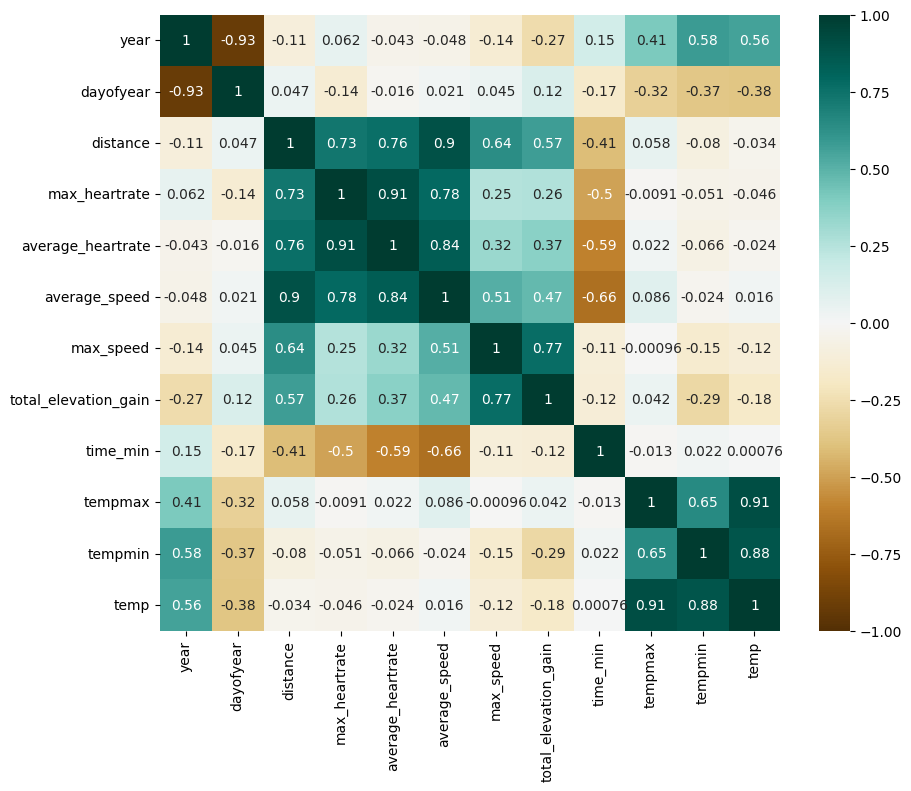

In [52]:
# criando um gráfico de heatmap de correlação
df_heatmap = df_strava_clima.drop(columns=['date', 'start_time', 'name', 'type', 'month', 'weekday', 'conditions', 'icon', 'description'], axis=1)
fig = sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG")
fig.figure.set_size_inches(10, 8)

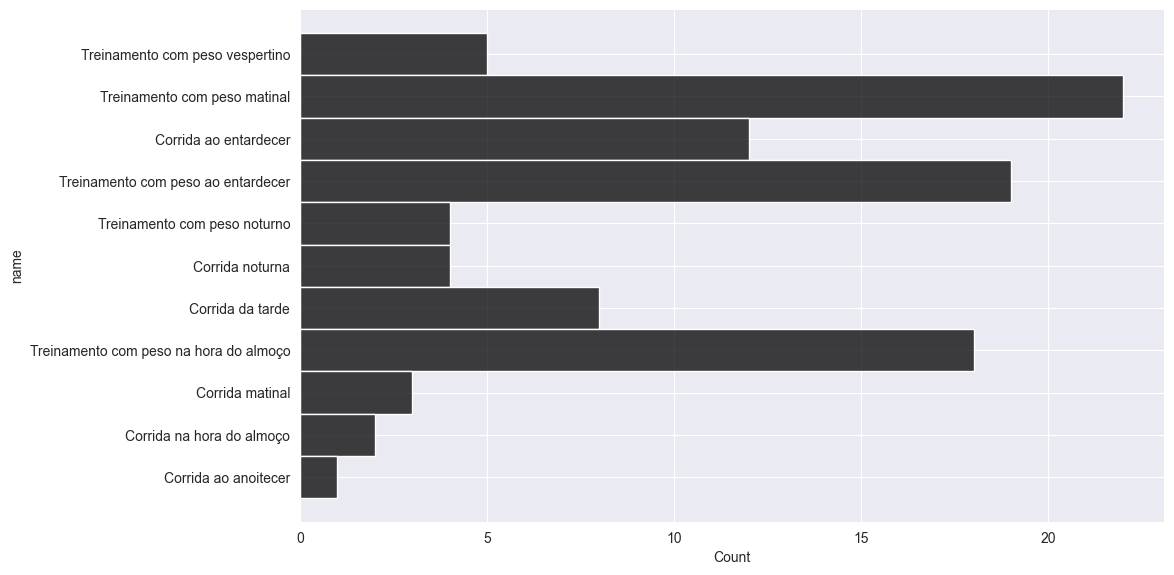

In [ ]:
# identificando minhas prefencias de horário dos treinos, prefiro ir pela manhã, final da tarde ou na hora do almoço
fig = sns.displot(df_strava_clima, y='name', color='black')
fig.figure.set_size_inches(24, 6)

### Vários insights podem ser extraídos dos dados obtidos, entre eles:
- Geralmente descanso nos finais de semana
- Tenho preferência por musculação
- Os horário que prefiro treinar são de manhã, final da tarde e na hora do almoço
- Melhorei muito a frequencia de treino de 2023 para 2024
- Preciso continuar para obter mais dados no longo prazo e melhorar as análises :D